
# Volume 2: OpenGym
Ethan Crawford

Math 347

3/7/23


In [21]:
import gym
import gym_toytext
import random
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

# Problem 1

*   Implement `random_blackjack()`.
*   Run the game 50,000 times and print the percentage of games that are wins.



In [2]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    wins = 0

    for _ in tqdm(range(n)):
        # Init a new Blackjack environment
        env = gym.make('Blackjack-v1')


        try:
            # Reset the environment
            env.reset()

            # Take random actions until the game terminates
            done = False
            while not done:
                # The actions in the action space are 0 to stop 
                # drawing and 1 to draw another card.
                random_action = env.action_space.sample()

                # The observation (first entry in the tuple returned 
                # by step) is a tuple containing the total sum of the 
                # player’s hand, the first card of the computer’s hand, 
                # and whether the player has an ace.

                # The reward (second entry in the tuple returned by step) 
                # is 1 if the player wins, -1 if the player loses, and 0 
                # if there is a draw.
                obs, reward, done, trunc, info = env.step(random_action)

                if done:
                    break
        finally:
            env.close()
        
        # Determine if the player or the computer won
        if reward == 1.0:
            wins += 1
  
    # Return the win percentage
    return wins/n

In [3]:
n = 50000
print(f"Win percentage after {n} games: {random_blackjack(n)}")

100%|██████████| 50000/50000 [00:13<00:00, 3589.45it/s]

Win percentage after 50000 games: 0.28254


# Problem 2

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [4]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    wins = 0
    iterations = 10000

    # Run 10,000 iterations of each n
    for _ in range(iterations):
        # Init a new Blackjack environment
        env = gym.make('Blackjack-v1')

        try:
            # Reset the environment
            env.reset()

            done = False
            action = 1
            while not done:
                
                obs, reward, done, trunc, info = env.step(action)
                
                # Draw cards until the player’s hand is more than n,
                # then stop drawing cards until the game terminates
                if obs[0] > n:
                  action=0

                if done:
                    break
        finally:
            env.close()
        
        # Determine if the player or the computer won
        if reward == 1.0:
            wins += 1
  
    # Return the win percentage
    return wins/iterations


In [5]:
# Calculate averages
averages = []
for i in tqdm(range(1,22)):
    averages.append(blackjack(i))

100%|██████████| 21/21 [00:49<00:00,  2.37s/it]


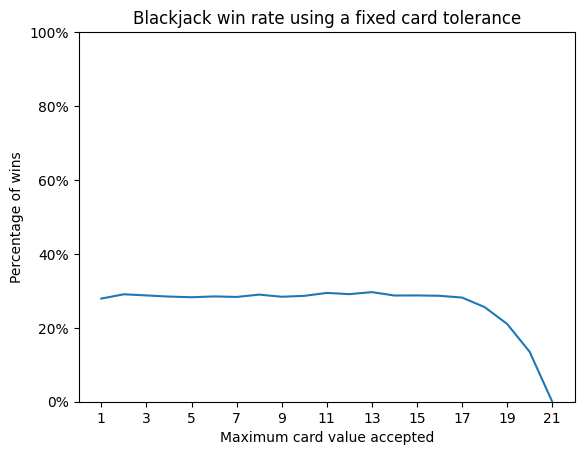

Card hand maximums that had the highest win-rate:
1: 12
2: 11
3: 13


In [6]:
# Plot
plt.plot(range(1,22), averages)
plt.title("Blackjack win rate using a fixed card tolerance")
plt.xlabel("Maximum card value accepted")
plt.ylabel("Percentage of wins")
plt.xticks(range(1,22,2))
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))
plt.show()

# Find the top 3 values of the averages
highest = np.argsort(averages)[-3:]

print("Card hand maximums that had the highest win-rate:")
for i in range(len(highest)):
    print(f'{i+1}: {highest[i]+1}')


# Problem 3

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [7]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v1 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    # Init a new CartPole environment
    count = 0
    render_mode = 'rgb_array' if render else None
    env = gym.make('CartPole-v1', render_mode=render_mode)

    try:
        # Reset the environment
        env.reset()

        # Display the plot if requested
        if render:
          img = plt.imshow(env.render())
          plt.axis('off')

        done = False
        action = 1
        while not done:
            # Get the environment space
            obs, reward, done, trunc, info = env.step(action)
            
            # If the velocity is positive, move the cart
            # to the right to balance.
            if obs[3] > 0:
              action=1
            # If the velocity is negative, move the cart
            # to the right to left.
            else:
              action=0

              # Update visualization
              if render:
                  img.set_data(env.render())
                  display.display(plt.gcf())
                  display.clear_output(wait=True)
            count += 1
            
            if done:
                break
    finally:
        env.close()
      
    return count

218

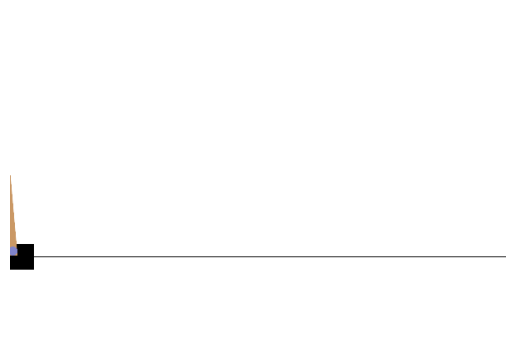

In [8]:
cartpole(True)

In [9]:
avg = []
for _ in range(101):
    avg.append(cartpole())

print(f'Average steps before termination: {sum(avg)/len(avg)}')

Average steps before termination: 198.8019801980198


# Problem 4

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [10]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    # Init a new MountainCar environment
    count = 0
    render_mode = 'rgb_array' if render else None
    env = gym.make('MountainCar-v0', render_mode=render_mode)

    try:
        # Reset the environment
        env.reset()

        # Display the plot if requested
        if render:
          img = plt.imshow(env.render())
          plt.axis('off')

        done = False
        action = 2
        while not done:
            # Get the environment space
            obs, reward, done, trunc, info = env.step(action)
            
            # Move to the right until the velocity is 0, then stop
            # acceleration until velocity is 0 again
            if obs[1] < 0:
              action=0
            else:
              action=2
        
            # Update visualization
            if render:
                img.set_data(env.render())
                display.display(plt.gcf())
                display.clear_output(wait=True)
            count += 1
            
            if done:
                break
    finally:
        env.close()
      
    return count

122

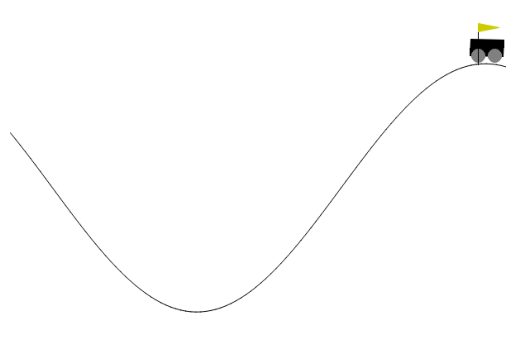

In [11]:
car(True)

In [12]:
avg = []
for _ in range(101):
    avg.append(car())

print(f'Average steps before termination: {sum(avg)/len(avg)}')

Average steps before termination: 120.39603960396039


## Helper Function for Problem 5

In [13]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state, info = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, truncated, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            display.clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table

# Problem 5

* Initialize the "`Taxi-v3`" environment (without rendering), act randomly until it terminates, and print the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and print the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [14]:
# Random actions Taxi game
def taxi_random():
    # Init environment
    total_reward = 0
    env = gym.make('Taxi-v3')

    try:
        # Reset the environment
        env.reset()

        # Take random actions until the game terminates
        done = False
        while not done:
            random_action = env.action_space.sample()
            obs, reward, done, trunc, info = env.step(random_action)
            
            # Get the total reward for all
            total_reward += reward

            if done:
                break
    finally:
        env.close()
    return total_reward

print(taxi_random())

-8760


In [15]:
qtable = find_qvalues('Taxi-v3')

Episode: 100000
Training finished.


In [16]:
# Q-table actions Taxi game
def taxi_qtable(qtable, render=False):
    # Init environment
    render_mode = 'rgb_array' if render else None
    env = gym.make('Taxi-v3', render_mode=render_mode)
    
    try:
        # Reset the environment
        env.reset()

        # Display the plot if requested
        if render:
          img = plt.imshow(env.render())
          plt.axis('off')

        obs, reward, done, trunc, info = env.step(env.action_space.sample())
        total_reward = reward

        while not done:
            # Get the environment space
            obs, reward, done, trunc, info = env.step(np.argmax(qtable[obs]))
            total_reward += reward
        
            # Update visualization
            if render:
                img.set_data(env.render())
                display.display(plt.gcf())
                display.clear_output(wait=True)
            
            if done:
                break
    finally:
        env.close()
        
    return total_reward

5


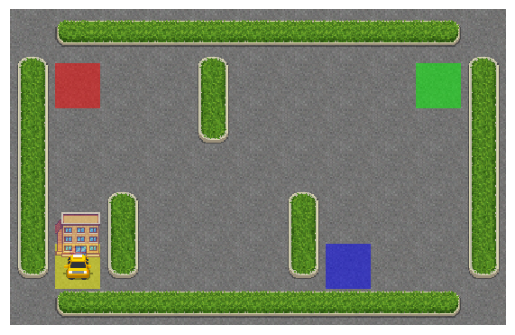

In [17]:
print(taxi_qtable(qtable, render=True))

In [18]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 1000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 1000 runs
    """
    def avg(arr):
      return sum(arr)/len(arr)
    
    # Declare arrays
    iterations = 1000
    random_avg = []
    qtable_random = []

    # Compute iterations of the game
    for _ in tqdm(range(iterations)):
        random_avg.append(taxi_random())
        qtable_random.append(taxi_qtable(q_table))
    
    # Return the averages
    return avg(random_avg), avg(qtable_random)

In [19]:
# Print the average rewards of the Taxi game for both algorithms run 1000 times
avgs = taxi(qtable)

100%|██████████| 1000/1000 [00:53<00:00, 18.74it/s]


In [20]:
for name, avg in zip(['naive', 'q table'], avgs):
  print(f'Average reward for {name} algorithm: {avg}')

Average reward for naive algorithm: -10290.879
Average reward for q table algorithm: 3.869
